# Import Statements

In [1]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

# Create environment

In [2]:
env = gym.make('CartPole-v1')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

observation space: Box(4,)
action space: Discrete(2)


# Define the initial parameters

In [3]:
class Initialize():
    def __init__(self):
        self.w = 1e-4 * np.random.rand(4, 2)  # Calculate weight for simple linear policy: state_space x action_space

    def forward(self, state):
        x = np.dot(state, self.w)
        return np.exp(x) / sum(np.exp(x))

    def act(self, state):   # Calculate the action 
        probs = self.forward(state)
        action = np.argmax(probs)  
        return action


# Initialize the environment

In [4]:
policy = Initialize()

# Train the cartpole and execute

In [5]:
def hill_climbing(num_episodes=1000, max_steps=200, gamma=0.9, noise=1e-2):
    # num_episodes is the maximum number of episodes
    # max_steps is the maximum number of steps per episode
    # gamma is the discount rate
    # noise is the standard deviation of additive noise
    
    scores_dq = deque(maxlen=100)     # Create a double ended queue of length 100
    scores = []     # Create an array to store the rewards per episode
    best_R = -np.Inf    # Initialize the best reward as negative infinity
    best_w = policy.w   # Initialize the best weight as the random weight calculated in the Initialize function
    for i_episode in range(1, num_episodes + 1): 
        rewards = []    # Array to store the rewards for every episode
        state = env.reset()
        # For every step in the episode, calculate the state, reward and append reward to the array rewards
        for t in range(max_steps):
            action = policy.act(state)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break
        scores_dq.append(sum(rewards))   # Append the sum of rewards for every episode to the double queue scores_dq
        scores.append(sum(rewards))  # Append the sum of rewards per episode to the array scores
        
        # Calculate the discount and reward for every episode
        discounts = [gamma ** i for i in range(len(rewards) + 1)]
        R = sum([a * b for a, b in zip(discounts, rewards)])
        
        # If reward of the episode is greater than best_R, then
        # 1. Assign the reward to best_R. 
        # 2. Assign the  as weight of current policy as best weight
        # 3. Calculate the noise as maximum of 0.001 and (noise/2) 
        # 4. Calculate the new weight for the policy
        if R >= best_R:  
            best_R = R
            best_w = policy.w
            noise = max(1e-3, noise / 2)
            policy.w += noise * np.random.rand(*policy.w.shape)
        # If reward of the episode is less than nest_R, calculate the noise as minimum of (2, noise*2). 
        # Add the best_weight to the policy weight
        else:  
            noise = min(2, noise * 2)
            policy.w = best_w + noise * np.random.rand(*policy.w.shape)
        # Print the average value for every 100 episodes
        if i_episode % 100 == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_dq)))
        # If score is greater than 200, assign best_w to the weigh tof the policy; end execution and return the scores
        if np.mean(scores_dq) >= 200.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode,
                                                                                       np.mean(scores_dq)))
            policy.w = best_w
            break

    return scores

scores = hill_climbing()

Episode 100	Average Score: 145.70
Environment solved in 142 episodes!	Average Score: 200.00


# Plot the graph to show scores

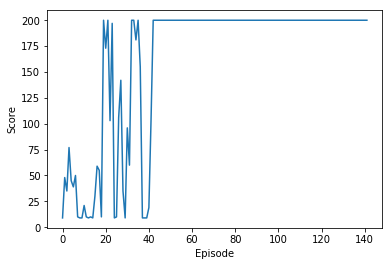

In [6]:
plt.plot(scores)
plt.ylabel('Score')
plt.xlabel('Episode')
plt.show()
env.close()